##### Dependencies

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading Data

In [165]:
df = pd.read_csv('Hotel_Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [166]:
df.shape

(119390, 32)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##### Check for missing values

In [168]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [169]:
df.drop('company', axis=1, inplace=True)

In [172]:
df.fillna(value={'country':'other_countries'}, inplace=True)

In [173]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


##### Which country do most travelers come from?

In [178]:
origin = df.groupby('country', as_index=False)['hotel'].count().sort_values(by='hotel', ascending=False)
origin.head()

,country,hotel
135,PRT,48590
59,GBR,12129
56,FRA,10415
51,ESP,8568
43,DEU,7287


[Text(0, 0, ''),
 Text(0, 1, ''),
 Text(0, 2, ''),
 Text(0, 3, ''),
 Text(0, 4, ''),
 Text(0, 5, ''),
 Text(0, 6, ''),
 Text(0, 7, ''),
 Text(0, 8, ''),
 Text(0, 9, ''),
 Text(0, 10, ''),
 Text(0, 11, ''),
 Text(0, 12, ''),
 Text(0, 13, ''),
 Text(0, 14, ''),
 Text(0, 15, ''),
 Text(0, 16, ''),
 Text(0, 17, ''),
 Text(0, 18, ''),
 Text(0, 19, ''),
 Text(0, 20, ''),
 Text(0, 21, ''),
 Text(0, 22, ''),
 Text(0, 23, ''),
 Text(0, 24, ''),
 Text(0, 25, ''),
 Text(0, 26, ''),
 Text(0, 27, ''),
 Text(0, 28, ''),
 Text(0, 29, ''),
 Text(0, 30, ''),
 Text(0, 31, ''),
 Text(0, 32, ''),
 Text(0, 33, ''),
 Text(0, 34, ''),
 Text(0, 35, ''),
 Text(0, 36, ''),
 Text(0, 37, ''),
 Text(0, 38, ''),
 Text(0, 39, ''),
 Text(0, 40, ''),
 Text(0, 41, ''),
 Text(0, 42, ''),
 Text(0, 43, ''),
 Text(0, 44, ''),
 Text(0, 45, ''),
 Text(0, 46, ''),
 Text(0, 47, ''),
 Text(0, 48, ''),
 Text(0, 49, ''),
 Text(0, 50, ''),
 Text(0, 51, ''),
 Text(0, 52, ''),
 Text(0, 53, ''),
 Text(0, 54, ''),
 Text(0, 55, ''),
 T

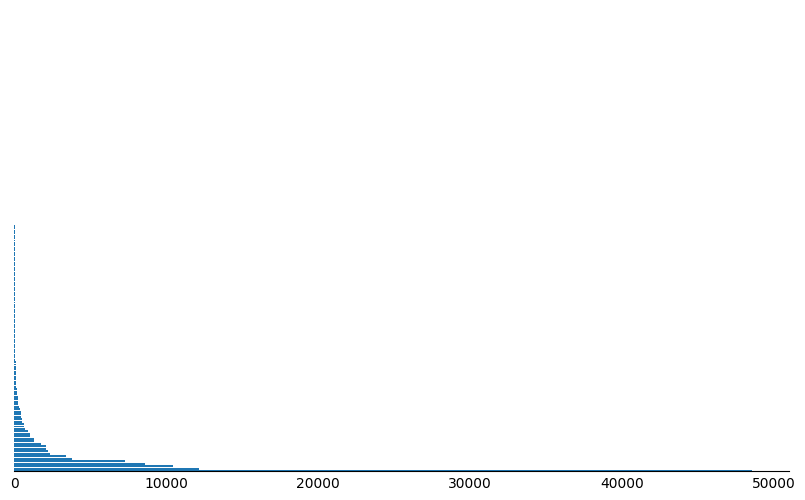

In [215]:

fig, ax = plt.subplots(figsize=(10,6))
plt.barh(y=origin.country, width=origin.hotel)
ax.set_ylim(0)
ax.tick_params(length=0)
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.set_yticklabels([])


list the 5 countries with the most passengers.

##### which type of hotels booked most? 

In [175]:
df.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [185]:
hotel_book = df.groupby('hotel', as_index=False)['hotel'].value_counts()
hotel_book

,hotel,count
0,City Hotel,79330
1,Resort Hotel,40060


([<matplotlib.patches.Wedge at 0x1a66b299790>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

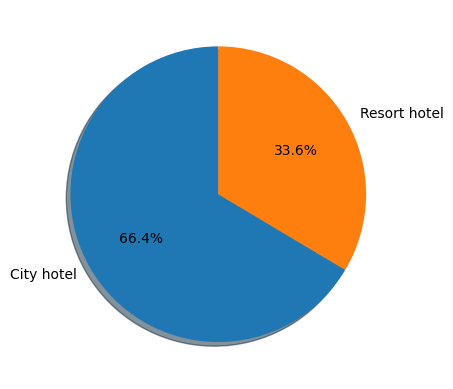

In [186]:
fig, ax = plt.subplots()
ax.pie(hotel_book['count'], labels=['City hotel', 'Resort hotel'], autopct='%1.1f%%',
        shadow=True, startangle=90)

City hotel has 66.4 percentage of total booked hotels, it means that between these two hotels City booked most.

##### What percentage of bookings were cancelled?

In [187]:
canceled_filter = df[df.is_canceled.eq(1)]
canceled = canceled_filter.groupby('hotel', as_index=False)['is_canceled'].count()

booked = df.groupby('hotel', as_index=False)['hotel'].value_counts()

f = booked.merge(canceled, on='hotel')

f['cancelled_percent'] = round(f.is_canceled / f['count'] * 100, 0)
f

,hotel,count,is_canceled,cancelled_percent
0,City Hotel,79330,33102,42.0
1,Resort Hotel,40060,11122,28.0


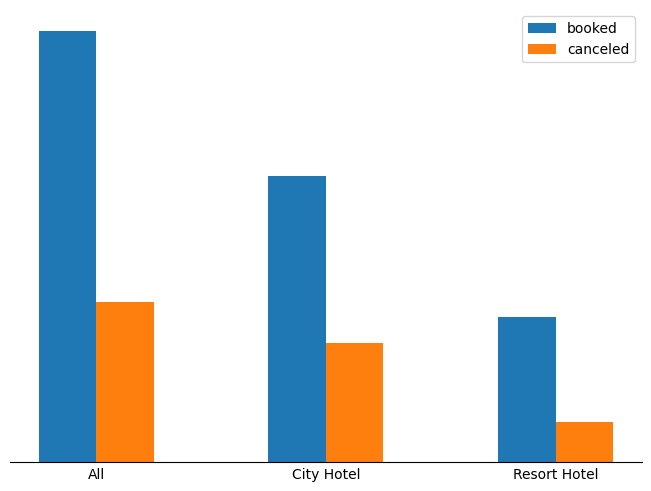

In [188]:
hotels = ('All', 'City Hotel', 'Resort Hotel')
reservation_info = {
    'booked': (119390, 79330, 40060),
    'canceled': (44224, 33102, 11122)
}
x = np.arange(len(hotels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in reservation_info.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, align='edge')
    multiplier += 1

ax.set_xticks(x + width, hotels)
ax.legend(loc='upper right')
ax.set_ylim(0)
ax.tick_params(length=0)
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.set_yticklabels([])

plt.show()

Based on reservation table info and the above bar plot, 37 percent of all reservation was cancelled. In detail, 42 percent of City hotel reservations and 28 percent of Resort hotel reservation were cancelled.

##### In different years, what type of hotels were booked most and booked least? 

In [217]:
booked_year = pd.pivot_table(df, values='reservation_status', columns='hotel', index='arrival_date_year', aggfunc='count')

for ind in booked_year.index:
    if booked_year.at[ind, 'City Hotel'] > booked_year.at[ind, 'Resort Hotel']:
        booked_year.at[ind, 'most_reserved_hotel'] = 'City'
    else:
        booked_year.at[ind, 'most_reserved_hotel'] = 'Resort'

booked_year

hotel,City Hotel,Resort Hotel,most_reserved_hotel
arrival_date_year,,,
2015,13682,8314,City
2016,38140,18567,City
2017,27508,13179,City


[Text(0, 0.0, ''),
 Text(0, 5000.0, ''),
 Text(0, 10000.0, ''),
 Text(0, 15000.0, ''),
 Text(0, 20000.0, ''),
 Text(0, 25000.0, ''),
 Text(0, 30000.0, ''),
 Text(0, 35000.0, ''),
 Text(0, 40000.0, ''),
 Text(0, 45000.0, '')]

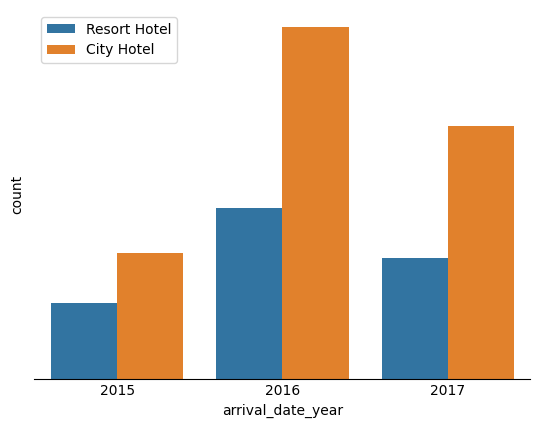

In [218]:
fig, ax = plt.subplots()
sns.countplot(data=df, x='arrival_date_year', hue='hotel')
ax.legend(loc='upper left')
ax.set_ylim(0)
ax.tick_params(length=0)
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.set_yticklabels([])

During all three available years in the dataset City hotel had the most booked number. We can see that 2016 was the peak of travels.

##### According to different hotel types, how ‘adr’ changes in different months? 

In [219]:
adr_month = df.groupby(['hotel', 'arrival_date_month'], as_index=False)['adr'].mean()
adr_month

,hotel,arrival_date_month,adr
0,City Hotel,April,111.251838
1,City Hotel,August,114.680455
2,City Hotel,December,88.826307
3,City Hotel,February,85.088278
4,City Hotel,January,82.628986
5,City Hotel,July,110.734292
6,City Hotel,June,119.074341
7,City Hotel,March,92.643116
8,City Hotel,May,121.638560
9,City Hotel,November,88.069601


Text(0, 0.5, '')

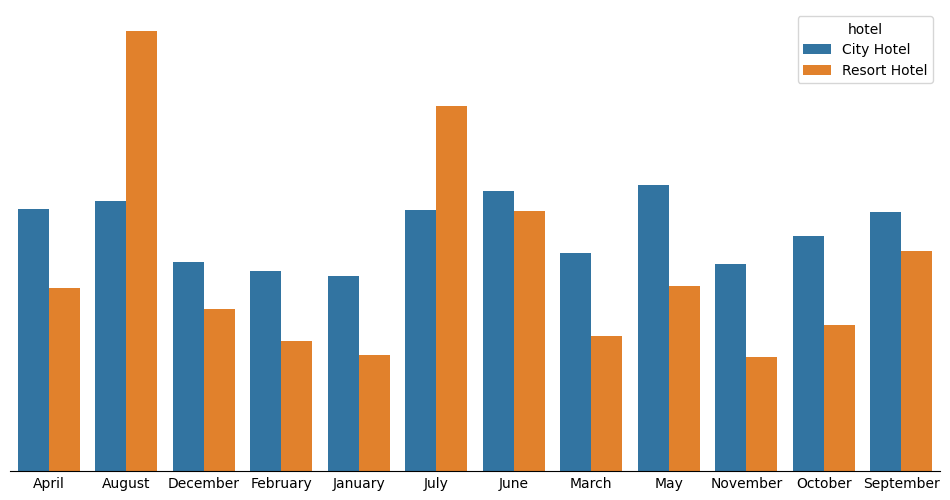

In [220]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=adr_month, x='arrival_date_month', y='adr', hue='hotel')
ax.set_ylim(0)
ax.tick_params(length=0)
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.set_yticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

#####  Check hotel wise daily rates mean, standard deviation, median, min and max

In [221]:
df1 = df.groupby('reservation_status_date', as_index=False)['adr'].sum()
df1

,reservation_status_date,adr
0,2014-10-17,11304.00
1,2014-11-18,0.00
2,2015-01-01,47353.90
3,2015-01-02,154.14
4,2015-01-18,0.00
...,...,...
921,2017-09-08,404.05
922,2017-09-09,886.67
923,2017-09-10,581.09
924,2017-09-12,153.57


In [222]:
df1.adr.describe()

count      926.000000
mean     13129.176674
std       8408.105050
min          0.000000
25%       8217.577500
50%      13568.645000
75%      17761.065000
max      92575.570000
Name: adr, dtype: float64

<Axes: xlabel='reservation_status_date', ylabel='adr'>

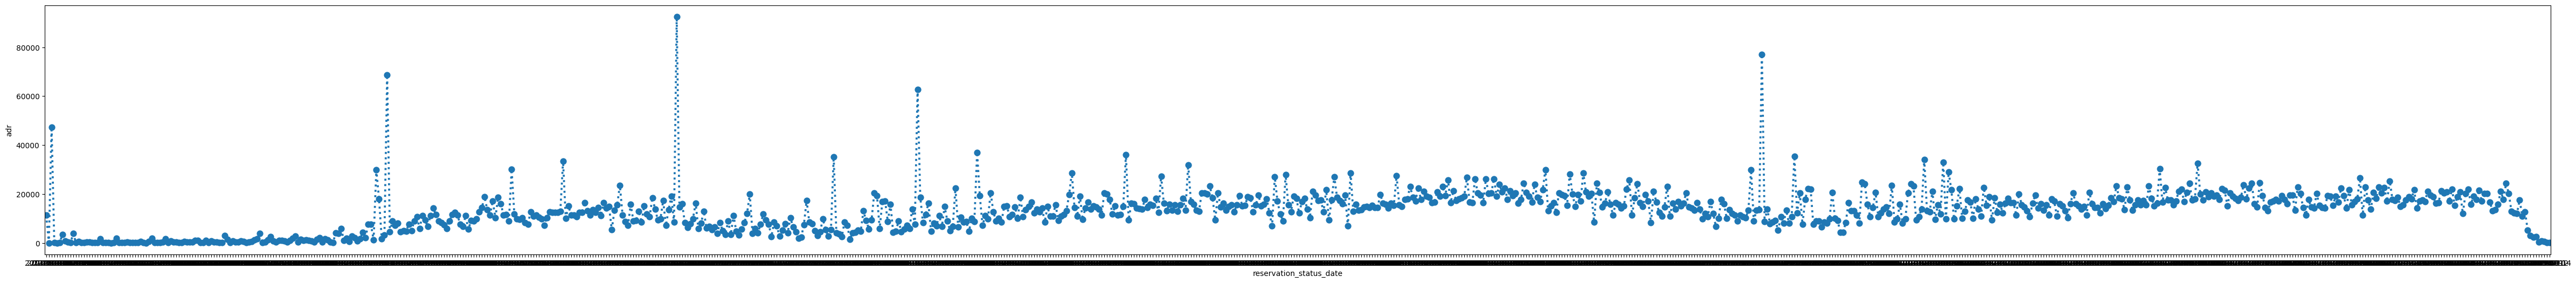

In [223]:
fig, ax = plt.subplots(figsize=(60,6))
sns.pointplot(x="reservation_status_date", y="adr", data=df1, linestyles="dotted")


In [224]:
df.adr.describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

12/09/2017 had the minimum check-out rate with one check-out.

##### According to the ‘market_segment’ most of the guests book their rooms on what channels? 

In [225]:
market = df.groupby('market_segment', as_index=False).hotel.count()

market['channel'] = None
for ind in market.index:
    if market.at[ind, 'market_segment'] in ['Aviation', 'Corporate']:
        market.at[ind, 'channel'] = 'Corporate'
    elif market.at[ind, 'market_segment'] in ['Complementary', 'Direct', 'Groups']:
        market.at[ind, 'channel'] = 'Direct'
    elif market.at[ind, 'market_segment'] in ['Offline TA/TO', 'Online TA']:
        market.at[ind, 'channel'] = 'TA/TO'

market

,market_segment,hotel,channel
0,Aviation,237,Corporate
1,Complementary,743,Direct
2,Corporate,5295,Corporate
3,Direct,12606,Direct
4,Groups,19811,Direct
5,Offline TA/TO,24219,TA/TO
6,Online TA,56477,TA/TO
7,Undefined,2,None


In [226]:
channel = market.groupby('channel', as_index=False)['hotel'].sum()
channel.loc[channel.hotel == channel.hotel.max()]

,channel,hotel
2,TA/TO,80696


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


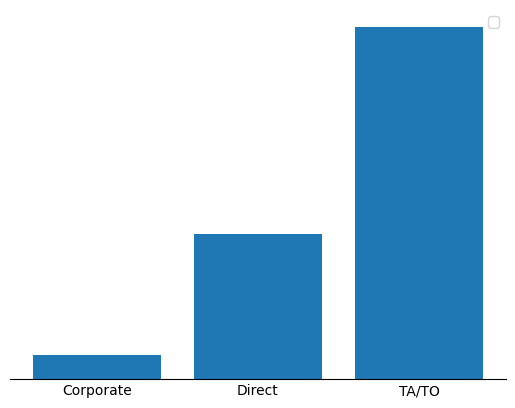

In [227]:
fig, ax = plt.subplots()
ax.bar(channel.channel, channel.hotel)
ax.legend(loc='upper right')
ax.set_ylim(0)
ax.tick_params(length=0)
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.set_yticklabels([])

plt.show()

Text(0.5, 0, '')

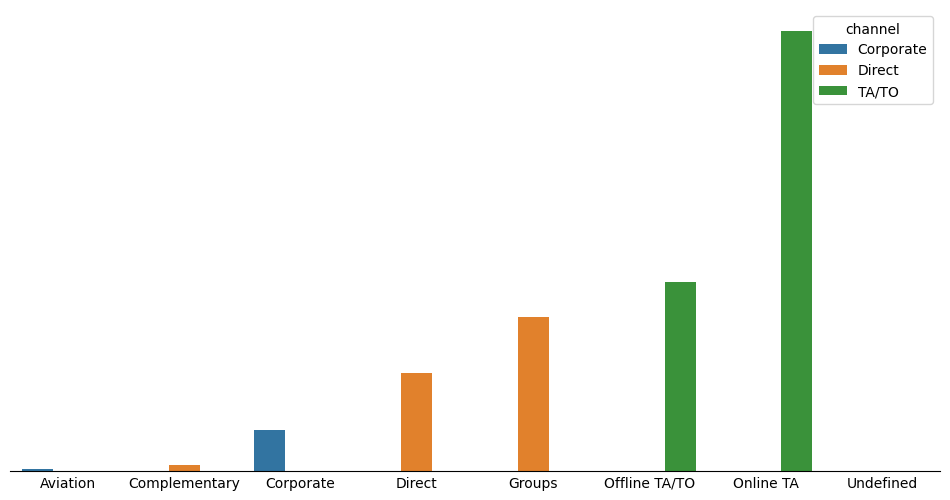

In [232]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=market, x='market_segment', y='hotel', hue='channel')
ax.set_ylim(0)
ax.tick_params(length=0)
ax.spines[['right', 'left', 'top']].set_visible(False)
ax.set_yticklabels([])
ax.set_ylabel('')
ax.set_xlabel('')

Most of the reservations had done by TA/TO channel. In TA/TO channel the online segment has more lot. 
In the Direct channel groups, direct, and complementary segments have the most lot in order.

##### Hotel meals distribution

In [233]:
df.groupby('meal', as_index=False)['meal'].value_counts()

,meal,count
0,BB,92310
1,FB,798
2,HB,14463
3,SC,10650
4,Undefined,1169


<Axes: xlabel='meal', ylabel='count'>

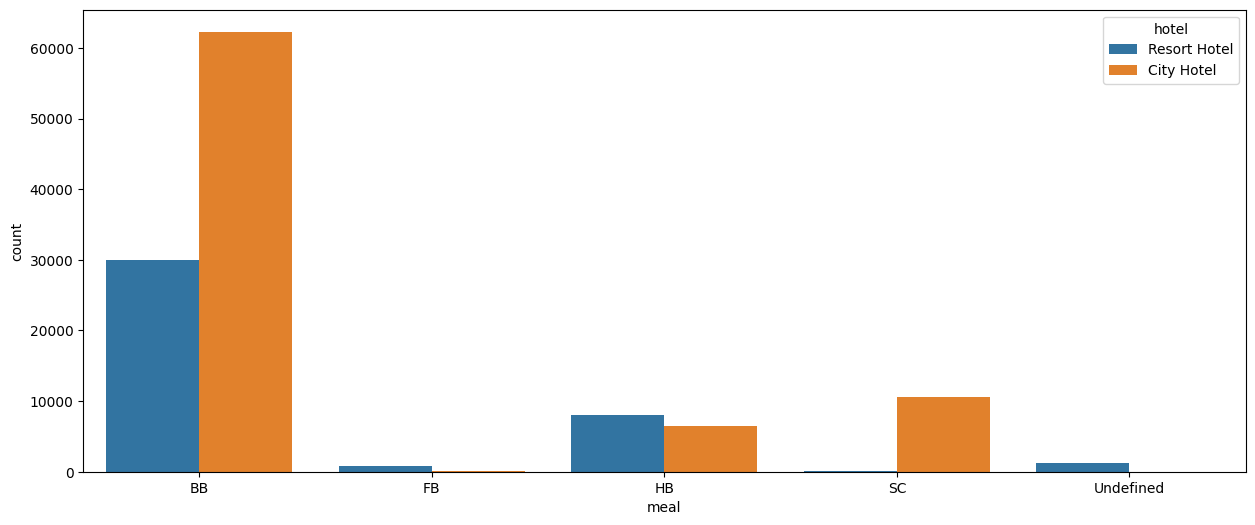

In [234]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(data=df, x='meal', hue='hotel')

What attracts attention is that all the SC meals are reserved in City hotel. And most of the people just reserve hotel for bed and breakfast.

##### percentage of repeated guest in each hotel

In [235]:
repeated = df[df.is_repeated_guest.eq(1)]

In [236]:
repeated_travel = repeated.groupby('hotel', as_index=False)['is_repeated_guest'].count()
all_travel = df.groupby('hotel', as_index=False)['reservation_status'].count()
df2 = repeated_travel.merge(all_travel, on='hotel')
df2['repeated%'] = round((df2.is_repeated_guest / df2.reservation_status) * 100, 1)
df2

,hotel,is_repeated_guest,reservation_status,repeated%
0,City Hotel,2032,79330,2.6
1,Resort Hotel,1778,40060,4.4


passengers back to Resort hotel more...

##### Reserved and Assigned Room Type

In [237]:
rooms = pd.pivot_table(data=df, index='reserved_room_type', values='hotel', columns='assigned_room_type', aggfunc='count')
rooms

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,P
reserved_room_type,,,,,,,,,,,,
A,73598.0,1123.0,1447.0,7548.0,1156.0,417.0,186.0,94.0,215.0,210.0,NaN,NaN
B,111.0,988.0,NaN,5.0,2.0,2.0,8.0,NaN,NaN,2.0,NaN,NaN
C,5.0,2.0,883.0,6.0,4.0,2.0,10.0,10.0,10.0,NaN,NaN,NaN
D,312.0,27.0,34.0,17736.0,686.0,204.0,82.0,9.0,67.0,44.0,NaN,NaN
E,15.0,3.0,8.0,22.0,5923.0,404.0,100.0,4.0,40.0,16.0,NaN,NaN
F,6.0,17.0,NaN,4.0,31.0,2707.0,116.0,3.0,10.0,3.0,NaN,NaN
G,5.0,2.0,2.0,NaN,4.0,14.0,2041.0,7.0,15.0,4.0,NaN,NaN
H,NaN,NaN,NaN,1.0,NaN,NaN,10.0,584.0,6.0,NaN,NaN,NaN
L,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN


<Axes: xlabel='assigned_room_type', ylabel='reserved_room_type'>

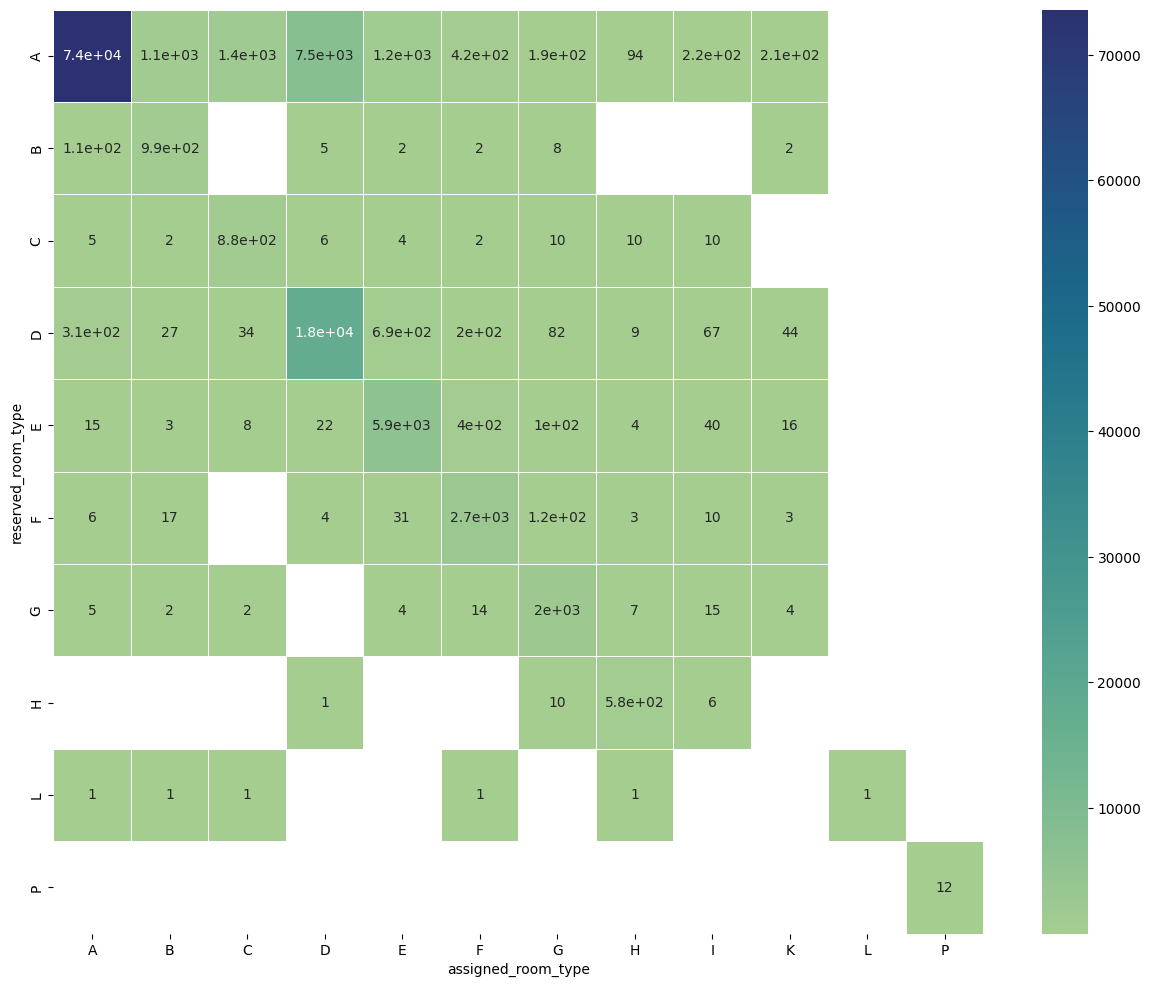

In [238]:
fig = plt.subplots(figsize=(15,12))
sns.heatmap(rooms, annot=True, linewidth=.5, cmap="crest")

##### Distribution of passengers based on age

In [239]:
passengers = df.groupby('hotel', as_index=False)[['adults', 'children', 'babies']].sum()
passengers['All'] = passengers.adults + passengers.children + passengers.babies
passengers

,hotel,adults,children,babies,All
0,City Hotel,146838,7248.0,392,154478.0
1,Resort Hotel,74798,5155.0,557,80510.0


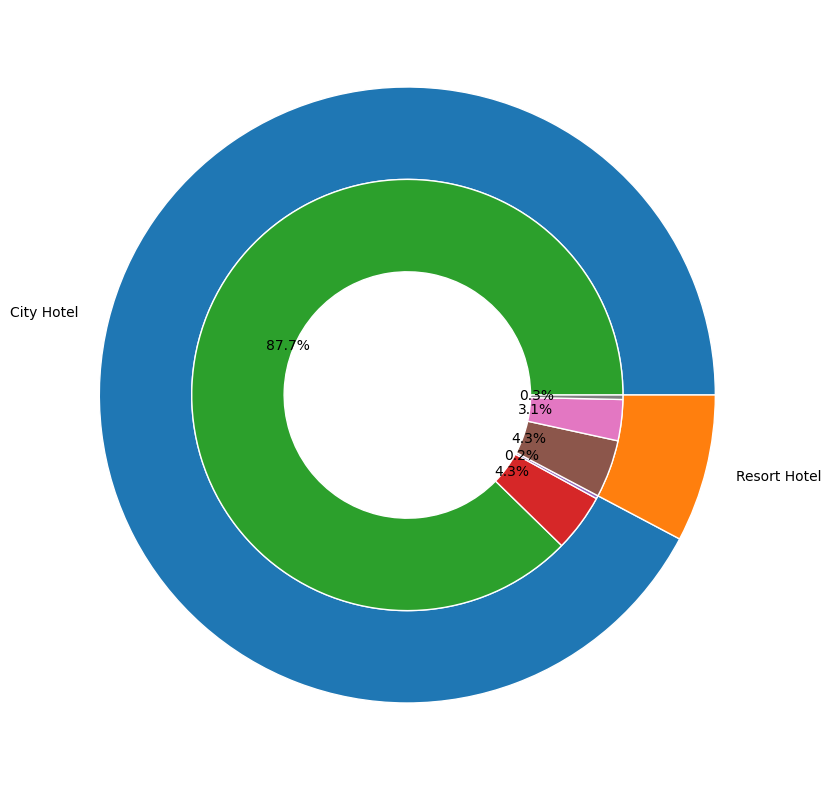

In [240]:
fig, ax = plt.subplots(figsize=(10,10))

size = 0.3
vals = np.array([[146838., 7248.0, 392], [7248.0, 5155.0, 557]])

ax.pie(vals.sum(axis=1), radius=1,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['City Hotel', 'Resort Hotel'])

ax.pie(vals.flatten(), radius=1-size,
       wedgeprops=dict(width=size, edgecolor='w'), autopct='%1.1f%%')

plt.show()